<a href="https://colab.research.google.com/github/dsankush/resume_screening/blob/main/resume_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Category : Category of job
Resume : Resume of job applicant 

# Libraries Importing 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/irvainqueur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Loading data from a csv file

In [ ]:
data = pd.read_csv('/home/irvainqueur/Documents/GlobalCert/Resume.csv')
data.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
data.describe(include=['O'])

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
data[data.duplicated()]

,Category,Resume
10,Data Science,Skills * Programming Languages: Python (pandas...
11,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
12,Data Science,"Areas of Interest Deep Learning, Control Syste..."
13,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
df_rmvd_duplicated = data.drop_duplicates()
df_rmvd_duplicated.shape

(166, 2)

# ED Analysis

In [ ]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
res_category = data['Category'].value_counts().reset_index().rename(columns={'index':'category','Category':'category_count'})
res_category

,category,category_count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


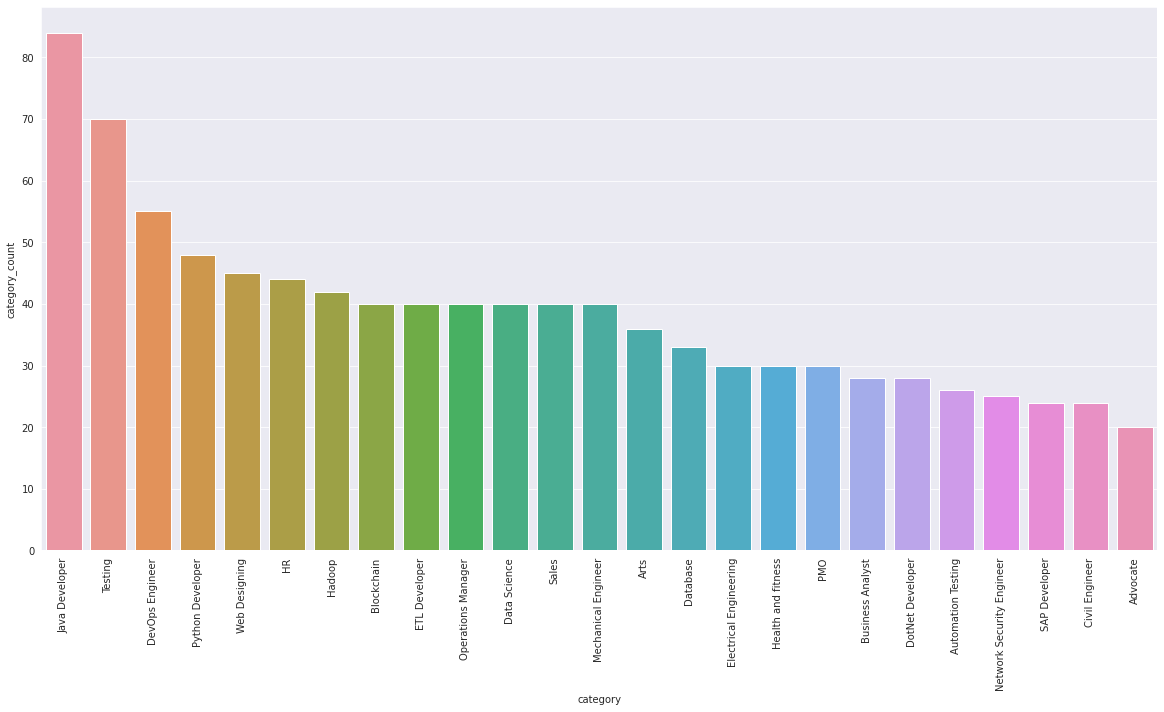

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x=res_category['category'],y=res_category['category_count'])
plt.show()

In [ ]:
res_category_rd = df_rmvd_duplicated['Category'].value_counts().reset_index().rename(columns={'index':'category','Category':'category_count'})
res_category_rd

,category,category_count
0,Java Developer,13
1,Database,11
2,Data Science,10
3,Advocate,10
4,HR,10
5,DotNet Developer,7
6,Hadoop,7
7,DevOps Engineer,7
8,Automation Testing,7
9,Testing,7


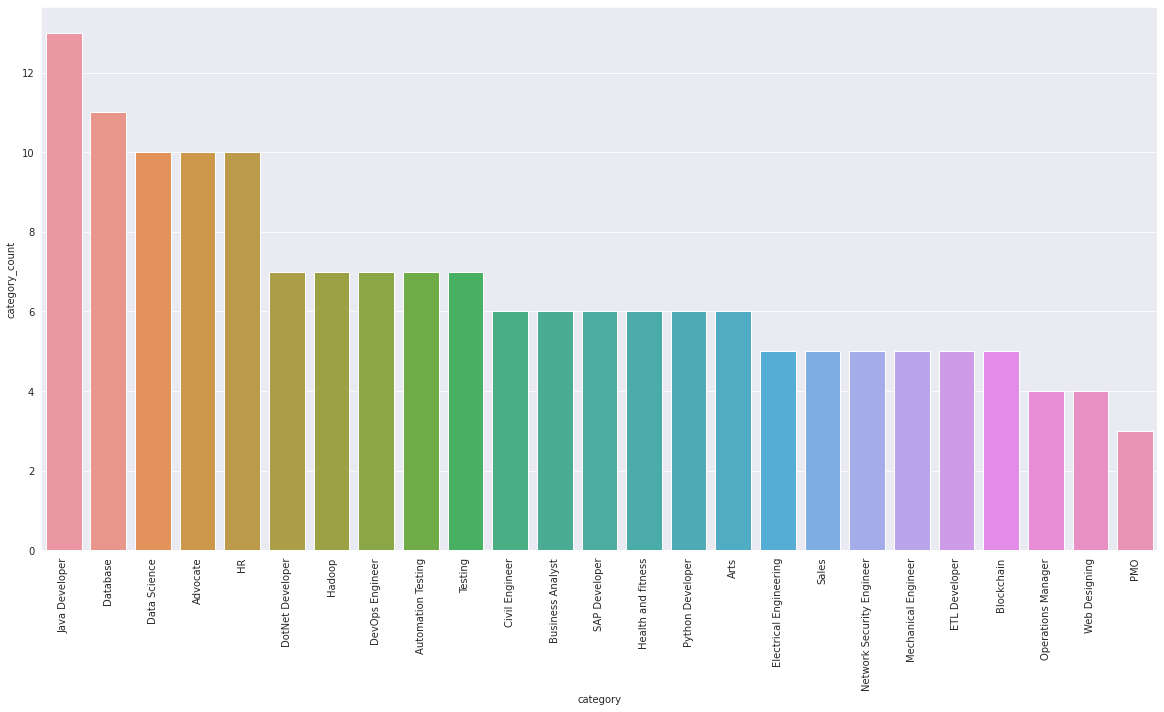

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x=res_category_rd['category'],y=res_category_rd['category_count'])
plt.show()

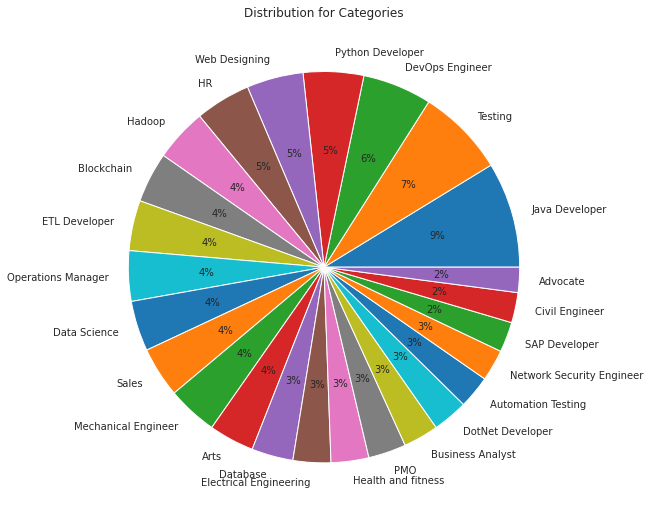

In [ ]:
plt.figure(figsize=(12,9))
plt.pie(res_category['category_count'],labels=res_category['category'],autopct='%.0f%%')
plt.title("Distribution for Categories")
plt.show()

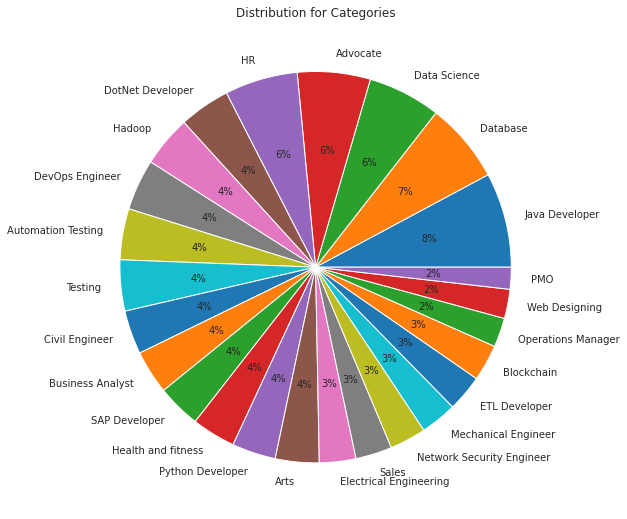

In [ ]:
plt.figure(figsize=(12,9))
plt.pie(res_category_rd['category_count'],labels=res_category_rd['category'],autopct='%.0f%%')
plt.title("Distribution for Categories")
plt.show()

# Natural Language Processing 

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_set = set(stopwords.words('english')+['``',"''"])

def clean_resume_text(resume):
    resume = resume.lower()
    resume = re.sub('http\S+\s*',' ',resume) #to remove url
    resume = ''.join([w for w in resume if not w.isdigit()]) # remove the digits
    resume = re.sub('RT|cc',' ',resume) # to remove RT and cc
    resume = re.sub('#\S+','',resume) # to remove hastags
    resume = re.sub('@\S+',' ',resume) # to remove mentions
    resume = ''.join([w for w in resume if w not in string.punctuation])# to remove puntuations
    resume = re.sub('\W',' ',resume)
    resume = re.sub(r'[^\x00-\x7f]',r' ',resume)
    resume = re.sub('\s+',' ',resume)# to remove extra spaces
    return resume

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/irvainqueur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def common_words(resum_sen):
    avail_stopwords = set(stopwords.words('english')+['``',"''"])
    all_words = []
    clean_sen = ""

    for resume in resum_sen:
        clean_res = clean_resume_text(resume)
        clean_sen += clean_res
        tokens = nltk.word_tokenize(clean_res)
        all_words.extend([word for word in tokens if (word not in avail_stopwords) and (word not in string.punctuation) and len(word)>2])
    word_freq = nltk.FreqDist(all_words)
    comm = word_freq.most_common(50)
    return comm,clean_sen

In [ ]:
common,clean_sen = common_words(data['Resume'].values)

In [ ]:
print("Common words in dataset that contains repeated resumes: ")
print(common)

Common words in dataset that contains repeated resumes: 
[('exprience', 3829), ('company', 3536), ('project', 3361), ('months', 3283), ('description', 3122), ('details', 3096), ('data', 2137), ('management', 1989), ('team', 1922), ('maharashtra', 1449), ('system', 1395), ('year', 1340), ('testing', 1339), ('database', 1274), ('business', 1195), ('development', 1187), ('less', 1145), ('test', 1140), ('ltd', 1128), ('using', 1124), ('skill', 1101), ('january', 1090), ('engineering', 1055), ('application', 1035), ('developer', 1033), ('pune', 1025), ('java', 1015), ('client', 1015), ('work', 987), ('sql', 966), ('services', 951), ('skills', 950), ('software', 871), ('responsibilities', 856), ('pvt', 831), ('reports', 814), ('sales', 801), ('process', 792), ('requirements', 790), ('technologies', 764), ('operations', 761), ('server', 757), ('technical', 755), ('customer', 752), ('university', 751), ('india', 750), ('monthscompany', 746), ('working', 745), ('various', 727), ('design', 715)]

In [ ]:
common,clean_sen = common_words(df_rmvd_duplicated['Resume'].values)

In [ ]:
print("Common words in dataset that contains unique resumes: ")
print(common)

Common words in dataset that contains unique resumes: 
[('exprience', 616), ('company', 596), ('description', 540), ('details', 531), ('project', 525), ('months', 524), ('data', 387), ('management', 317), ('database', 276), ('team', 269), ('system', 234), ('year', 228), ('maharashtra', 228), ('testing', 215), ('using', 210), ('sql', 209), ('business', 204), ('less', 200), ('test', 200), ('ltd', 191), ('january', 190), ('skill', 187), ('server', 183), ('development', 180), ('developer', 169), ('java', 167), ('engineering', 162), ('skills', 161), ('pune', 158), ('client', 154), ('work', 153), ('application', 149), ('responsibilities', 148), ('software', 144), ('university', 142), ('pvt', 140), ('environment', 136), ('technical', 133), ('reports', 130), ('working', 127), ('monthscompany', 125), ('services', 125), ('india', 125), ('like', 125), ('various', 122), ('education', 122), ('requirements', 121), ('web', 118), ('automation', 117), ('technologies', 116)]


In [ ]:
data['cleaned_resume'] = data['Resume'].apply(clean_resume_text)

In [ ]:
data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may be uitrgpv data s...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
df_rmvd_duplicated['cleaned_resume'] = df_rmvd_duplicated['Resume'].apply(clean_resume_text)

In [ ]:
df_rmvd_duplicated.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may be uitrgpv data s...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [ ]:
label = LabelEncoder()

In [ ]:
data['Category'] = label.fit_transform(data['Category'])

In [ ]:
df_rmvd_duplicated['Category'] = label.fit_transform(df_rmvd_duplicated['Category'])

In [ ]:
clean_text = data['cleaned_resume']
target = data['Category']

In [ ]:
clean_text_rd = df_rmvd_duplicated['cleaned_resume']
target_rd = df_rmvd_duplicated['Category']

# Transform textuel data to numerical data  (In form of matrice)

In [ ]:
word_vec = TfidfVectorizer(
        sublinear_tf=True,
        stop_words='english',
        max_features=1500)

In [ ]:
word_vec.fit(clean_text)

TfidfVectorizer(max_features=1500, stop_words='english', sublinear_tf=True)


In [ ]:
word_feat = word_vec.transform(clean_text)

<962x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 108396 stored elements in Compressed Sparse Row format>

In [ ]:
word_vec.get_feature_names()[:10]

['abap',
 'ability',
 'able',
 'academic',
 'academy',
 'achieve',
 'achievements',
 'achieving',
 'act',
 'action']

In [ ]:
print(word_feat.todense()[:10])

[[0.         0.         0.         ... 0.03058674 0.         0.        ]
 [0.         0.         0.         ... 0.22114006 0.         0.        ]
 [0.         0.         0.         ... 0.18137555 0.         0.        ]
 ...
 [0.         0.08465242 0.         ... 0.06853155 0.06217109 0.        ]
 [0.         0.13006033 0.         ... 0.04818961 0.         0.        ]
 [0.         0.         0.         ... 0.03204349 0.         0.        ]]


In [ ]:
word_vec.fit(clean_text_rd)
word_feat_rd = word_vec.transform(clean_text_rd)

In [ ]:
word_vec.get_feature_names()[:10]

['abap',
 'ability',
 'able',
 'academic',
 'academy',
 'achieve',
 'achievements',
 'achieving',
 'act',
 'action']

In [ ]:
print(word_feat_rd.todense()[:10])

[[0.         0.         0.         ... 0.02914736 0.         0.        ]
 [0.         0.         0.         ... 0.21209024 0.         0.        ]
 [0.         0.         0.         ... 0.19052519 0.         0.        ]
 ...
 [0.         0.08255628 0.         ... 0.06895275 0.05689234 0.        ]
 [0.         0.12600438 0.         ... 0.04816643 0.         0.        ]
 [0.         0.         0.         ... 0.03189156 0.         0.        ]]


# Model Training 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(word_feat,target,random_state=42,test_size=0.2)

In [ ]:
x_train_rd,x_test_rd,y_train_rd,y_test_rd = train_test_split(word_feat_rd,target_rd,random_state=42,test_size=0.2)

# Building multiclassification OvR with KNeighbors Classifier

In [ ]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
y_pred = model.predict(x_test)

# Model Evaluation 

In [ ]:
print(f"Training Accuracy: {(model.score(x_train,y_train)*100).round(2)} %")
print(f"Testing Accuracy: {(model.score(x_test,y_test)*100).round(2)} %")

Training Accuracy: 99.09 %
Testing Accuracy: 98.45 %


In [ ]:
print("Classification Report: ")
print(metrics.classification_report(y_test,y_pred))

Classification Report: 
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      0.60      0.75         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00 

In [ ]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train_rd,y_train_rd)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
y_pred_rd = model.predict(x_test_rd)

In [ ]:
print(f"Training Accuracy when duplicate rows in dataset was removed: {(model.score(x_train_rd,y_train_rd)*100).round(2)} %")
print(f"Testing Accuracy when duplicate rows in dataset was removed: {(model.score(x_test_rd,y_test_rd)*100).round(2)} %")

Training Accuracy when duplicate rows in dataset was removed: 87.12 %
Testing Accuracy when duplicate rows in dataset was removed: 82.35 %


In [ ]:
print("Classification Report when duplicate rows in dataset was removed:: ")
print(metrics.classification_report(y_test_rd,y_pred_rd))

Classification Report when duplicate rows in dataset was removed:: 
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       1.00      0.50      0.67         2
         Business Analyst       1.00      0.33      0.50         3
           Civil Engineer       1.00      1.00      1.00         2
             Data Science       0.33      1.00      0.50         1
                 Database       1.00      1.00      1.00         2
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       1.00      1.00      1.00         1
                       HR       1.00      0.80      0.89         5
                   Hadoop       1.00      1.00      1.00         3
       Health and fitness       1.00      1.00      1.00         2
           Java Developer       1.00      1.00      1.00         1
      Mechanical Engineer       0.50      1.00      0.67    